# STEPs:
    1. Apply Label Encoding on 'diagnosis' feature.
    2. Plotting use countplot and showing the datafram with heatmap(describe, co-relation)
    3. Train = 70%, test = 30%
    4. Apply Decision Tree 
    5. Apply Confusion Matrix
    6. Evaluate Model accuracy, precision, recall, f1-score etc.
    7. Plot ROC and AUC curve


In [14]:
import pandas as pd
import numpy as np
import sklearn as skl 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [15]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Breast Cancer.xlsx')

In [16]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302.0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517.0,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903.0,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301.0,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402.0,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    float64
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [18]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

**1. Label Encoding**

---



In [19]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()

In [20]:
df.diagnosis = le.fit_transform(df[['diagnosis']]) # applying label encoder

In [21]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302.0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517.0,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903.0,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301.0,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402.0,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**2. Count Plot**

---



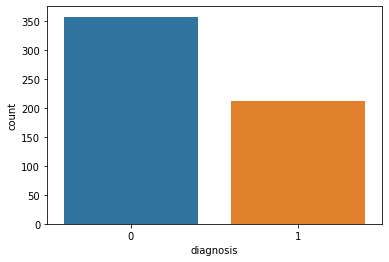

In [22]:
sns.countplot(x='diagnosis', data = df) # This plot shows count value of 0 and 1

In [23]:
df.diagnosis.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [24]:
df.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


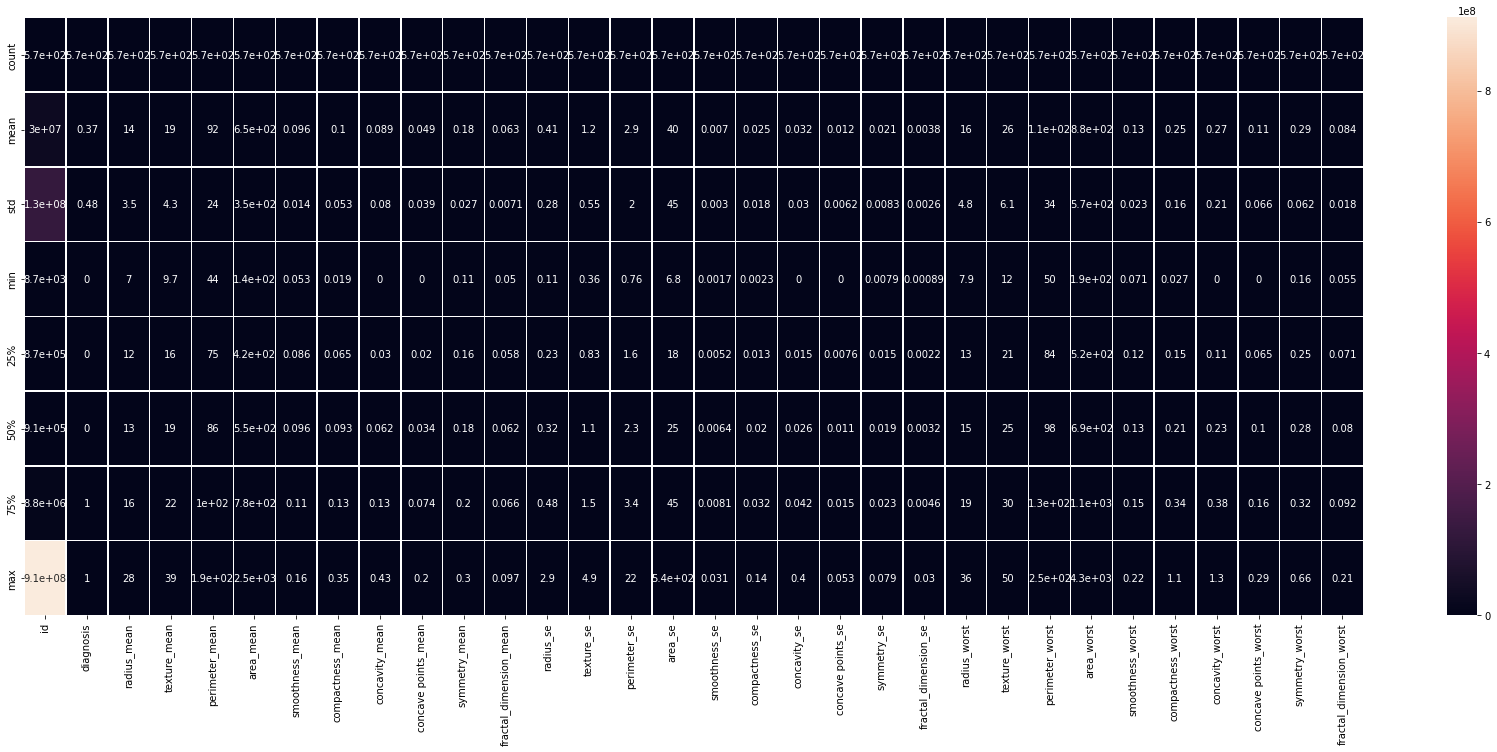

In [25]:
from matplotlib import pyplot as plt # Showing describe with heatmap to visualize the data
plt.figure(figsize=(30,11))
sns.heatmap(df.describe(), annot=True, linewidth=.5)

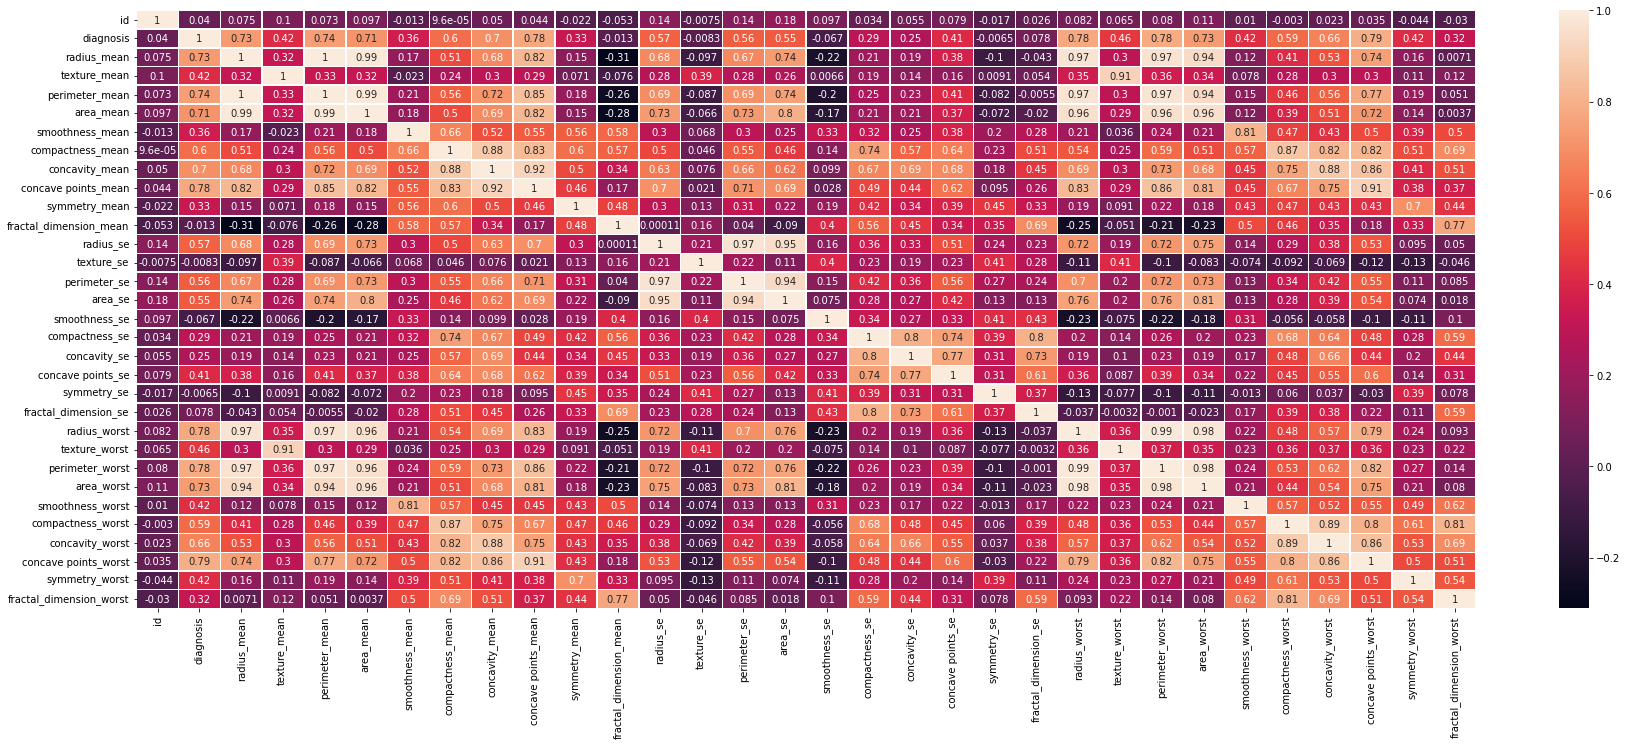

In [26]:
plt.figure(figsize=(30,11)) # Co-relation between each feature plotting with heatmap
sns.heatmap(df.corr(), annot=True, linewidth=.5)

In [ ]:
sns.countplot(x='concavity_mean', hue='diagnosis', data=df)

In [30]:
df.shape

(569, 32)

**3. Splitting Train Test Data**

---



In [31]:
# drop dignosis column and store the new df into x
x = df.drop('diagnosis', axis=1)

In [32]:
# target feature
y = df[['diagnosis']]

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=.30, random_state=42) # split train test data

In [35]:
xtrain.shape

(398, 31)

In [36]:
xtest.shape

(171, 31)

**4. Applying Decision Tree**

---



In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
dtc = DecisionTreeClassifier()

In [39]:
dtc.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [40]:
p = dtc.predict(xtest)
p

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

**5. Applying COnfusion Matrix**

---



In [41]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_roc_curve

In [43]:
print(classification_report(ytest, p)) # complete report of the Decision Matrix model including acuracy, precision, recall, f-measure etc

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       108
           1       0.88      0.95      0.92        63

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.93       171
weighted avg       0.94      0.94      0.94       171



In [44]:
cm = confusion_matrix(ytest, p) # showing Confusion matrix

In [45]:
cm

array([[100,   8],
       [  3,  60]])

In [46]:
tp, fn, fp, tn = confusion_matrix(ytest, p).reshape(-1) # tp=True Positive, fn=False Negative, fp=False Positive, tn=True Negative. Here True,False is the actual data and Pos,Neg is the predicted data

In [47]:
tn

60

**6. Evaluating the model**

---



In [48]:
# Accuray
acc = (tp+tn)/(tp+fp+tn+fn) # It defines how often the model predicts the correct output.
acc

0.935672514619883

In [49]:
# Precision or Positive Predictive value
ppv = tp/(tp+fp) # It can be defined as the number of correct outputs provided by the model, how many of them were actually true.
ppv

0.970873786407767

In [50]:
# Sensitivity, Recall or True Positive Rate
tpr = tp/(tp+fn) # It is defined as the out of total positive classes, how our model predicted correctly.
tpr

0.9259259259259259

In [51]:
# False Positive Rate or 1-Specifity
fpr = fp/(fp+tn)
fpr

0.047619047619047616

In [52]:
# F1 Measure
#If two models have low precision and high recall, it is difficult to compare these models. So, for this purpose, we can use F-score
fm = (ppv+tpr)/2

In [53]:
fm

0.9483998561668465

In [54]:
# Harmoic Mean, F1 Score

f1 = (2*ppv*tpr)/(ppv+tpr)
f1

0.9478672985781991

In [55]:
# Specifity, Selectivity or True Negative Rate
# Specificity (true negative rate) refers to the probability of a negative test, conditioned on truly being negative
tnr = tn/(tn+fp)
tnr

0.9523809523809523

In [56]:
# Threat Score(TS) or Critical Success Index(CSI)
csi = tp/(tp+fn+fp)
csi

0.9009009009009009

In [57]:
# False Discovery Rate
fdr = fp/(tp+fp)
fdr

0.02912621359223301

**7. ROC and AUC curve**

---



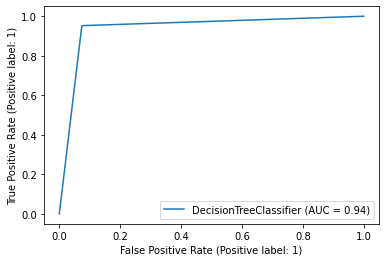

In [58]:
# The ROC is a graph displaying a classifier's performance for all possible thresholds
plot_roc_curve(dtc,xtest,ytest)

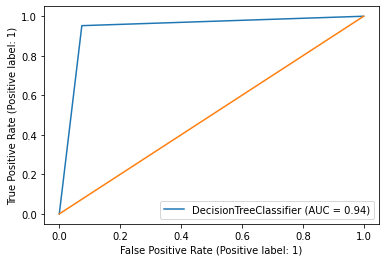

In [59]:
plot_roc_curve(dtc, xtest, ytest)
plt.plot([0,1],[0,1])